# ASK 1

<i><b>Location where the most number of funding is done means, location where startups has received funding maximum number of times.
can choose only between three locations -  Bangalore, Mumbai, and NCR. </i></b>

In [1]:
# lets import needed python libraries like pandas , numpy and matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style


In [2]:
# Now lets make a dataframe of startup csv file

startup = pd.read_csv(r"C:\Users\vigya\PycharmProjects\Temp1Learn\startup_funding.csv")
df = startup.copy()

In [3]:
# For our task lets make a reference to the column "CityLocation" and drop the NaN values from it

c = df["CityLocation"]
c.dropna(inplace=True)

In [4]:
# Converting the particular column to "c" numpy array and changing all "Delhi" -> "New Delhi" & "bangalore" -> "Bangalore"

c = c.values
c[c == "Delhi"] = "New Delhi"
c[c == "bangalore"] = "Bangalore"

In [5]:
# Traversed through the "c" numpy array and appended normally or after spliting on " / " to a new list "city"
# only if location is 'Bangalore' or 'Mumbai' or 'New Delhi' or 'Noida' or 'Gurgaon'

city = []
for i in range(c.size):
    if " / " in c[i]:
        temp = c[i].split(" / ")
        for j in temp:
            if j == 'Bangalore' or j == 'Mumbai' or j == 'New Delhi' or j == 'Noida' or j == 'Gurgaon':
                city.append(j)
    else:
        if c[i] == 'Bangalore' or c[i] == 'Mumbai' or c[i] == 'New Delhi' or c[i] == 'Noida' or c[i] == 'Gurgaon':
            city.append(c[i])

In [6]:
# Converting list to nparray and finding its unique elements int "loc" and its corresponding counts into "fundtimes"
#also making a copy of counts for use in furthur plotting graph

city = np.array(city)
uncity = np.unique(city, return_counts=True)
loc = uncity[0]
fundtimes = uncity[1]
barfundtimes = uncity[1].copy()

In [7]:
# Taversing through "loc" - unique elements finding max index and fetching city with max time it got investment
# making current fundtime i.e max index as 0 so that furthur on next traversal it is not maximum

for i in range(loc.size):
    ind = np.argmax(fundtimes)
    print(loc[ind], fundtimes[ind])
    fundtimes[ind] = 0

Bangalore 635
Mumbai 449
New Delhi 388
Gurgaon 241
Noida 79


<ipython-input-8-99259ccd2f3f>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, barfundtimes[i]//2, barfundtimes[i], ha='center', Bbox=dict(facecolor='white', alpha=0.3))


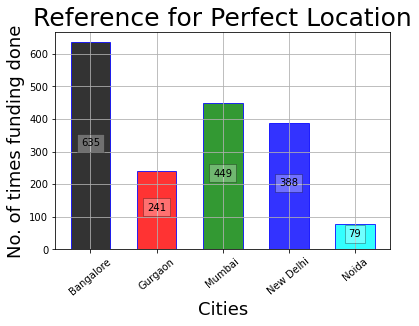

<Figure size 1152x648 with 0 Axes>

In [8]:
# As we have recieved the required details we will plot a bar graph 

def labels(loc, barfundtimes):
    for i in range(loc.size):
        plt.text(i, barfundtimes[i]//2, barfundtimes[i], ha='center', Bbox=dict(facecolor='white', alpha=0.3))

plt.bar(loc, barfundtimes, width=0.6, color=['black', 'red', 'green', 'blue', 'cyan'], edgecolor="blue", linewidth=1, alpha=0.8)
labels(loc, barfundtimes)
style.use('ggplot')
plt.title("Reference for Perfect Location", size=25)
plt.xticks(rotation=40)
plt.xlabel("Cities", size = 18)
plt.ylabel("No. of times funding done", size = 18)
plt.grid()
plt.figure(figsize=(16, 9))
plt.show()


<b><a1><u>Answer to ASK 1</u></a1></b>
<i>It can bee clearly seen in output as well as in graph that Bangalore can be considered as the perfect location as startups have received funding maximum number of times in Bangalore.</i>

# ASK 2

<i><b>Top 5 investors who have invested maximum number of times
    consider repeat investments in one company also.
    keeping in mind to ignore undisclosed investors</i></b>

In [9]:
# Lets take the column "InvestorsName" and create a reference to it and drop all NaN values from it and create it as a nparray

investor = df["InvestorsName"]
investor.dropna(inplace=True)
investor = investor.values

In [10]:
# "InvestorsName" has ", " -> comma and space seprated values 
# We will split on this basis ", " and append them also in f1investor

f1investor = []
for i in range(investor.size):
    if ", " in investor[i]:
        temp = investor[i].split(", ")
        for j in temp:
            f1investor.append(j)
    else:
        f1investor.append(investor[i])

In [11]:
# f1investor also has only comma seprated values now now ","
# we will again split f1investor on the basis of "," and append it in finvestor
# Also we will include conditon of not including if it has Others / empty / undisclosed

finvestor = []
for i in range(len(f1investor)):
    if "," in f1investor[i]:
        temp = f1investor[i].split(",")
        for j in temp:
            if "Others" in j or "Undisclosed" in j or j == "":
                continue
            finvestor.append(j)
    else:
        if "Others" in f1investor[i] or "Undisclosed" in f1investor[i] or f1investor[i] == "":
            continue
        finvestor.append(f1investor[i])


In [12]:
# Now we have finvestor containing all seprate values i.e seprate names of investors
# We will get unique investors and their count by :

uinvestor = np.unique(finvestor, return_counts=True)
inv = uinvestor[0]
count = uinvestor[1]

In [13]:
# For storing data to creat a pie chart we can have seprate empty list

piecount = []
pieinv = []

In [14]:
# Now we will run loop for 5 times and find max index on basis of count each time 
# Using that index print investor name and its corresponding count 
# Then making that count location 0 , so that next time 2nd heighest will be taken as max
# Also side by side appending elements in empty list we took for creating Pie chart later

for i in range(5):
    ind = np.argmax(count)
    print(inv[ind], count[ind])
    piecount.append(count[ind])
    pieinv.append(inv[ind])
    count[ind] = 0

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
Indian Angel Network 40
SAIF Partners 40


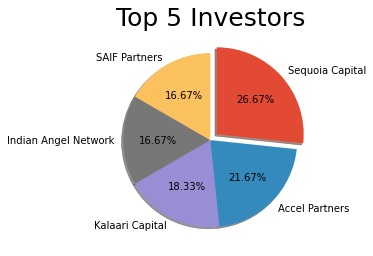

<Figure size 1152x648 with 0 Axes>

In [15]:
# Plotting pie Chart

plt.pie(piecount, labels=pieinv, autopct="%.2f%%", counterclock=False, startangle=90,
        explode=[0.1, 0, 0, 0, 0], shadow=True)
style.use('ggplot')
plt.title("Top 5 Investors", size=25)
plt.grid()
plt.figure(figsize=(16, 9))
plt.show()

<b><a1><u>Answer to ASK 2</u></a1></b>
<i> Pie chart clearly specifies the top 5 investors , and among them "Sequoia Capital" has done maximum investment overall. </i>

# ASK 3

<i><b>Top 5 investors who have invested maximum number of times in different companies <br> errors in startup names - important ones - Ola, Flipkart, Oyo and Paytm.</i></b>

In [16]:
# For this ask we will work upon two columns "InvestorsName" & "StartupName"
# For "InvestorsName" we already had a list finvestor containing all seprate values i.e seprate names of investors
# For "StartupName" we will take this column values in nparray

startup = df["StartupName"].values

In [17]:
# Now we will set up conditions for corrections in important startups

startup[startup == "Oyorooms"] = "Oyo"
startup[startup == "Oyo Rooms"] = "Oyo"
startup[startup == "OYO Rooms"] = "Oyo"
startup[startup == "OyoRooms"] = "Oyo"

startup[startup == "Ola Cabs"] = "Ola"
startup[startup == "Olacabs"] = "Ola"

startup[startup == "Flipkart.com"] = "Flipkart"

startup[startup == "Paytm Marketplace"] = "Paytm"

In [18]:
# We have corrected startup column now we will work on investorname column
# We will fill NaN values in "InvestorsName" with some unknown value -> "xx" and then converting it to nparray

investor = df["InvestorsName"]
investor.fillna("xx", inplace=True)
investor = investor.values

In [19]:
# Here size of both "InvestorsName" & "StartupName" is same 
# We also have finvestor which is containing all seprate values i.e seprate names of investors
# We will take unique investors name from finvestor into uinvestor 

uinvestor = np.unique(finvestor)


In [20]:
# Now we will Traverse over investorName and Split elements firstly on the basis of ", " 
# And inplace of appending into other list we will place after spliting at that particular location only

for i in range(investor.size):
    if ", " in investor[i]:
        investor[i] = investor[i].split(", ")
        
# Now we have list in place of elements which had ", " (comma with space) in them
# But there are certain elements which also had only "," (comma) in them 
# So we will again Traverse over investorName and Split elements secondly on the basis of "," 
# And inplace of appending into other list we will place after spliting at that particular location only

for i in range(investor.size):
    if type(investor[i]) is list:
        for j in range(len(investor[i])):
            if "," in investor[i][j]:
                investor[i][j] = investor[i][j].split(",")
# Now we have a list in place of elements which had "," (comma) in them
# That is we may have list inside list in place of elements
# so, investor is having string elements , list having strng elements , list having string and list also


In [21]:
# Lets Now take an empty list "checkinvestor" and a dictonary with empty string of keys startup column

checkinvestor = []
tempdic = {}
for i in startup:
    tempdic[i] = ""

In [22]:
# We will Traverse over Unique Investors (uinvestor) we created from finvestor
# take each its element (inve) and then traverse over just created investor 
# if investor has the unique investors name (inve) 
# we will check if unique investors name (inve) is in dictonary with correcponding starupname as key
# if yes we will pass this iteration
# if not , we will add the string (unique investors name (inve)) in dictonary with correcponding starupname as key
# And append the empty list "checkinvestor" with the unique investor name(inve)

for inve in uinvestor:
    for i in range(len(investor)):
        if inve in investor[i]:
            if inve in tempdic[startup[i]]:
                continue
            else:
                tempdic[startup[i]] += inve
                checkinvestor.append(inve)

In [23]:
# Now we will will get unique investors from just created list "checkinvestor" with their corresponding counts

checkinvestor = np.array(checkinvestor)
ucheckinvestor = np.unique(checkinvestor, return_counts=True)

# Unique investors name

uin = ucheckinvestor[0]

# Unique investors counts

uco = ucheckinvestor[1]

In [24]:
# For storing data to create a pie chart we can have seprate empty list

pieinv = []
piecount = []

In [25]:
# Now we will run loop for 5 times and find max index on basis of count each time 
# Using that index print investor name and its corresponding count 
# Then making that count location 0 , so that next time 2nd heighest will be taken as max
# Also side by side appending elements in empty list we took for creating Pie chart later

for i in range(5):
    ind = np.argmax(uco)
    print(uin[ind], uco[ind])
    pieinv.append(uin[ind])
    piecount.append(uco[ind])
    uco[ind] = 0

Accel Partners 49
Sequoia Capital 48
Kalaari Capital 42
Indian Angel Network 40
Blume Ventures 37


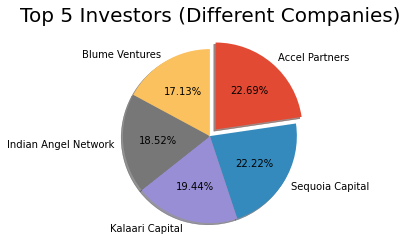

<Figure size 1152x648 with 0 Axes>

In [26]:
# plotting Pie chart

plt.pie(piecount, labels=pieinv, autopct="%.2f%%", counterclock=False, startangle=90,
        explode=[0.1, 0, 0, 0, 0], shadow=True)
style.use('ggplot')
plt.title("Top 5 Investors (Different Companies)", size=20)
plt.grid()
plt.figure(figsize=(16, 9))
plt.show()

<b><a1><u>Answer to ASK 3</u></a1></b>
<i>  Pie chart clearly specifies the top 5 investors , and among them "Accel Partners" has done maximum investment in diffrent companies. </i>

# ASK 4

<i><b>Top 5 investors who have invested maximum number of times in different companies <br> investment type is Crowdfunding or Seed Funding. <br> Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding" <br>  errors in startup names - important ones - Ola, Flipkart, Oyo and Paytm.</i></b>

In [27]:
# For this ask we will work upon three columns "InvestorsName" & "StartupName" & "InvestmentType"
# For "InvestorsName" we already had a list finvestor containing all seprate values i.e seprate names of investors
# and we made a unique invetors name from finster -> uinvestor
# We also have investor with string elements , list having strng elements , list having string and list also
# We have startup with all the corrections made in startupname
# We just need to get investmentType done.

In [28]:
# Taking "InvestmentType" column and filling all NaN with temporary value - > "xx"
# And then converting it to nparray

df["InvestmentType"].fillna("xx", inplace=True)
investmenttype = df["InvestmentType"].values


In [29]:
# Correct spelling of investment types

investmenttype[investmenttype == "Crowd funding"] = 'Crowd Funding'
investmenttype[investmenttype == 'SeedFunding'] = 'Seed Funding'
investmenttype[investmenttype == 'PrivateEquity'] = 'Private Equity'

In [30]:
# Lets Now take an empty list "checkinvestor" and a dictonary with empty string of keys startup column

checkinvestor = []
tempdic = {}
for i in startup:
    tempdic[i] = ""

In [31]:
# We will Traverse over Unique Investors (uinvestor) we created from finvestor
# take each its element (inve) and then traverse over just created investor 
# if investor has the unique investors name (inve) 
# we will check if unique investors name (inve) is in dictonary with correcponding starupname as key
# if yes we will pass this iteration
# if not , we will check if investmenttype is "Crowd Funding" or 'Seed Funding'
# we will add the string (unique investors name (inve)) in dictonary with correcponding starupname as key
# And append the empty list "checkinvestor" with the unique investor name(inve)

for inve in uinvestor:
    for i in range(len(investor)):
        if inve in investor[i]:
            if inve in tempdic[startup[i]]:
                continue
            else:
                if investmenttype[i] == "Crowd Funding" or investmenttype[i] == 'Seed Funding':
                    tempdic[startup[i]] += inve
                    checkinvestor.append(inve)

In [32]:
# Now we will will get unique investors from just created list "checkinvestor" with their corresponding counts

checkinvestor = np.array(checkinvestor)
ucheckinvestor = np.unique(checkinvestor, return_counts=True)

# Unique investors name

uin = ucheckinvestor[0]

# Unique investors counts

uco = ucheckinvestor[1]

In [33]:
# For storing data to create a pie chart we can have seprate empty list

pieinv = []
piecount = []

In [34]:
# Now we will run loop for 5 times and find max index on basis of count each time 
# Using that index print investor name and its corresponding count 
# Then making that count location 0 , so that next time 2nd heighest will be taken as max
# Also side by side appending elements in empty list we took for creating Pie chart later

for i in range(5):
    ind = np.argmax(uco)
    print(uin[ind], uco[ind])
    pieinv.append(uin[ind])
    piecount.append(uco[ind])
    uco[ind] = 0

Indian Angel Network 33
Rajan Anandan 21
Anupam Mittal 16
Group of Angel Investors 16
LetsVenture 15


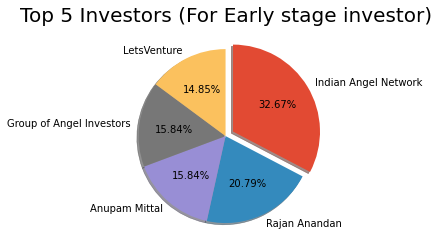

<Figure size 1152x648 with 0 Axes>

In [35]:
# Plotting Pie Chart

plt.pie(piecount, labels=pieinv, autopct="%.2f%%", counterclock=False, startangle=90,
        explode=[0.1, 0, 0, 0, 0], shadow=True)
style.use('ggplot')
plt.title("Top 5 Investors (For Early stage investor)", size=20)
plt.grid()
plt.figure(figsize=(16, 9))
plt.show()

<b><a1><u>Answer to ASK 4</u></a1></b>
<i>  Pie chart clearly specifies the top 5 investors , and among them "Indian Angel Network" has done maximum investment in diffrent companies <br> and investmenttype is "Crowd Funding" or 'Seed Funding' for early stage </i>

# ASK 5

<i><b>Top 5 investors who have invested maximum number of times in different companies <br> investment type is Private Equity <br> Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding" <br>  errors in startup names - important ones - Ola, Flipkart, Oyo and Paytm.</i></b>

In [36]:
# For this ask we will work upon three columns "InvestorsName" & "StartupName" & "InvestmentType"
# For "InvestorsName" we already had a list finvestor containing all seprate values i.e seprate names of investors
# and we made a unique investors name from finvestor -> uinvestor
# We also have investor with string elements , list having strng elements , list having string and list also
# We have startup with all the corrections made in startupname
# We also have investmentType done.

In [37]:
# Lets Now take an empty list "checkinvestor" and a dictonary with empty string of keys startup column

checkinvestor = []
tempdic = {}
for i in startup:
    tempdic[i] = ""

In [38]:
# We will Traverse over Unique Investors (uinvestor) we created from finvestor
# take each its element (inve) and then traverse over just created investor 
# if investor has the unique investors name (inve) 
# we will check if unique investors name (inve) is in dictonary with correcponding starupname as key
# if yes we will pass this iteration
# if not , we will check if investmenttype is "Private Equity"
# we will add the string (unique investors name (inve)) in dictonary with correcponding starupname as key
# And append the empty list "checkinvestor" with the unique investor name(inve)

for inve in uinvestor:
    for i in range(len(investor)):
        if inve in investor[i]:
            if inve in tempdic[startup[i]]:
                continue
            else:
                if investmenttype[i] == "Private Equity":
                    tempdic[startup[i]] += inve
                    checkinvestor.append(inve)

In [39]:
# Now we will will get unique investors from just created list "checkinvestor" with their corresponding counts

checkinvestor = np.array(checkinvestor)
ucheckinvestor = np.unique(checkinvestor, return_counts=True)

# Unique investors name

uin = ucheckinvestor[0]

# Unique investors counts

uco = ucheckinvestor[1]

In [40]:
# For storing data to create a pie chart we can have seprate empty list

pieinv = []
piecount = []

In [41]:
# Now we will run loop for 5 times and find max index on basis of count each time 
# Using that index print investor name and its corresponding count 
# Then making that count location 0 , so that next time 2nd heighest will be taken as max
# Also side by side appending elements in empty list we took for creating Pie chart later

for i in range(5):
    ind = np.argmax(uco)
    print(uin[ind], uco[ind])
    pieinv.append(uin[ind])
    piecount.append(uco[ind])
    uco[ind] = 0

Sequoia Capital 45
Accel Partners 44
Kalaari Capital 35
Blume Ventures 27
Tiger Global 25


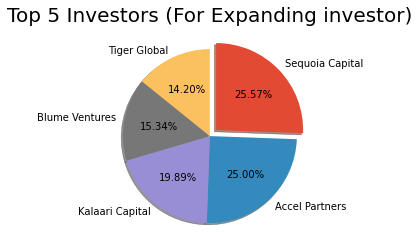

<Figure size 1152x648 with 0 Axes>

In [42]:
# Plotting Pie Chart

plt.pie(piecount, labels=pieinv, autopct="%.2f%%", counterclock=False, startangle=90,
        explode=[0.1, 0, 0, 0, 0], shadow=True)
style.use('ggplot')
plt.title("Top 5 Investors (For Expanding investor)", size=20)
plt.grid()
plt.figure(figsize=(16, 9))
plt.show()

<b><a1><u>Answer to ASK 5</u></a1></b>
<i>  Pie chart clearly specifies the top 5 investors , and among them "Sequoia Capital" has done maximum investment in diffrent companies <br> and investmenttype is "Private Equity" for expanding startup stage </i>